# Winter 2022 Data Science Intern Challenge

Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Question 1**: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
- What metric would you report for this dataset?
- What is its value?


## First, let's take a quick look at the data...

In [2]:
df = pd.read_csv("C:\\Users\\Martin\\Downloads\\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


I'm assuming that, when calculating the average order value (AOV), only the `order_amount` column was considered. I'll confirm this assertion below.

In [3]:
df.order_amount.mean()

3145.128

As I suspected, the calculation was based solely on the `order_amount` column. Let's see what the data looks like and if some order amounts are skewing the distribution.

In [4]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


<AxesSubplot:>

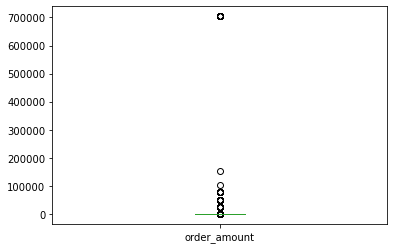

In [5]:
df.order_amount.plot.box()

## Now, let's do some calculations...

We can see here that there is at least one order with a total of \\$704,000. As shown by the box plot above, this outlier skews our average to the right. Since we are looking to consider a central measure with respect to `order_amount` it would be more accurate to look at the median in this case which, according to our summary above, is **$284.00**. 

However, I think that only tells part of the story. I would also consider the average cost per sneaker sold during this time period. To find this, we would find the average cost per item per order (`order_amount / total_items`), and find the average of that amount across all stores in the 30-day window.

Now, we'll find the average cost per item in each order:

In [6]:
df.apply(lambda x: x.order_amount/x.total_items,axis='columns').mean()

387.7428

## Let's take a look at our results

As noted before, we found that our median `order_amount` was **\\$284.00**, and our average cost per item in each order was **$387.74**. Both numbers tell a different part of the whole story here. 

Our median tells us that half of the `order_amount`s were less than or equal to $284 and half were greater. We can also see, using the median `total_items`, that there are more or less **2 items per order**. This tells us the story of the general performance of sneaker shops during this time period.  

On the other hand, we obviously have some stores that performed really well during this time period. Since each store sells only one model of sneaker, the average cost per item per order (**$387.74 per sneaker**) shows us that those stores did really well compared to the rest during this period.

To get a clearer picture on average order values, we could  that also look at our quartile ranges. Let's see the summary statistics again.


In [7]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Looking at the quartile ranges, we can see that **75%** of order totals per store during this period were between **\\$90** and **$390** with **1 to 3 items per order**.

## Conclusion for Question 1

For this analysis, I would use **the median (\\$284)** and the **average cost per sneaker per order ($387.74)** to tell a more complete story about sneaker store sales during this 30-day window. The story seems to be that stores that sold more expensive sneakers, on average, sold more sneakers and performed better than stores selling less expensive sneakers during this period.

---

## Now, on to Question 2

**Question 2**: For this question you’ll need to use SQL. [Follow this link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

- How many orders were shipped by Speedy Express in total?
- What is the last name of the employee with the most orders?
- What product was ordered the most by customers in Germany?



### How many orders were shipped by Speedy Express in total?

`SELECT COUNT(DISTINCT O.orderid) AS "Total Orders By Speedy Express"
FROM Orders O
INNER JOIN Shippers S
ON O.shipperid=S.shipperid AND S.shippername='Speedy Express';`

There were a total of 54 orders shipped by Speedy Express.

### What is the last name of the employee with the most orders?

`WITH employee_order_counts AS (
	SELECT
    	E.employeeid,
    	E.lastname,
        COUNT(O.orderid) AS total_orders
    FROM Orders O
    INNER JOIN Employees E
    ON O.employeeid=E.employeeid
	GROUP BY E.employeeid, E.lastName
)
SELECT lastname, total_orders
FROM employee_order_counts
ORDER BY total_orders DESC
LIMIT 1;`

The last name of the employee with the most orders is Peacock who has 40 orders.

### What product was ordered the most by customers in Germany?

`WITH orders_from_germany AS(
	SELECT
    	OD.productid,
        P.ProductName,
        SUM(OD.quantity) AS total_product_orders
    FROM Customers C
    INNER JOIN Orders O
    ON C.customerid = O.customerid
    INNER JOIN OrderDetails OD
    ON O.orderid = OD.orderid
    INNER JOIN Products P
    ON OD.productid = P.productid
    WHERE C.country='Germany'
    GROUP BY OD.productid, P.ProductName
)
SELECT productname, total_product_orders 
FROM orders_from_germany
ORDER BY total_product_orders DESC
LIMIT 1;`

The product ordered the most by customers in Germany was Boston Crab Meat with 160 total orders.